<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Emilio Andrade &bull; 2025-12-21
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [8]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [9]:
# Leer los datos
data = pd.read_csv(
    'https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv'
)

# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]

# Muestra algunos datos
display(data.head())

# Muestra una descripción de los datos
display(data.describe())

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,2
1,Ivysaur,62,63,60,80,80,60,1
2,Venusaur,82,83,80,100,100,80,0
3,Charmander,52,43,65,60,50,39,2
4,Charmeleon,64,58,80,80,65,58,1


,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,0.569536
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.678331
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,0.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,0.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,0.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,1.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,2.000000



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


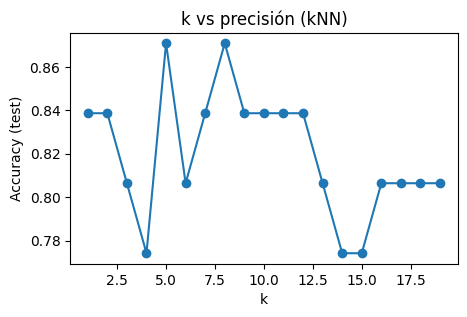

Mejor k: 5 | Accuracy: 0.871


In [10]:
y = data["Stage"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

ks = list(range(1, 20))
acc_test = []

for k in ks:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

best_k = ks[acc_test.index(max(acc_test))]

plt.figure(figsize=(5, 3))
plt.plot(ks, acc_test, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy (test)")
plt.title("k vs precisión (kNN)")
plt.show()

print("Mejor k:", best_k, "| Accuracy:", round(max(acc_test), 3))

Para determinar el valor de k en kNN se probó un rango de valores entre 1 y 19 y para cada k se midió la precisión en el conjunto de prueba. La gráfica k vs precisión muestra que el mejor desempeño se obtiene en k = 5 con una accuracy aproximada de 0.871, por lo tanto este valor se toma como el k óptimo para el modelo

Elegir k = 5 es razonable porque en este punto el modelo clasifica mejor los datos de prueba frente a los demás valores evaluados. Además al no ser un k demasiado pequeño se reduce el riesgo de que el modelo dependa mucho de casos individuales y al no ser demasiado grande se evita perder detalle en la separación de clases, así se mantiene un balance simple entre variación y estabilidad



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [11]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.871

Matriz de confusión:
 [[17  0  0]
 [ 1  9  1]
 [ 0  2  1]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.82      0.82      0.82        11
           2       0.50      0.33      0.40         3

    accuracy                           0.87        31
   macro avg       0.75      0.72      0.73        31
weighted avg       0.86      0.87      0.86        31



Con k = 5 se entrenó el modelo kNN usando los datos de entrenamiento y luego se evaluó con el conjunto de prueba. La accuracy obtenida fue 0.871, lo que indica un desempeño general bueno para clasificar la variable Stage en este conjunto

La matriz de confusión muestra que la clase 0 se identifica casi sin errores, 17 de 17. En la clase 1 hay algunos fallos, y en la clase 2 el rendimiento baja, porque solo hay 3 casos en prueba y el modelo acierta 1. Esto también se ve en el reporte, la clase 2 tiene recall 0.33 y f1 0.40, mientras que el promedio ponderado se mantiene alto por el peso mayor de las clases 0 y 1


---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [12]:
cols_x = ["Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"]
col_y = "HP"

data_reg = data[["Name", *cols_x, col_y]]

display(data_reg.head())
display(data_reg.describe())

scaler = StandardScaler()
X_reg = scaler.fit_transform(data_reg[cols_x])
y_reg = data_reg[col_y]

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
0,Bulbasaur,49,49,45,65,65,45
1,Ivysaur,62,63,60,80,80,60
2,Venusaur,82,83,80,100,100,80
3,Charmander,52,43,65,60,50,39
4,Charmeleon,64,58,80,80,65,58


,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


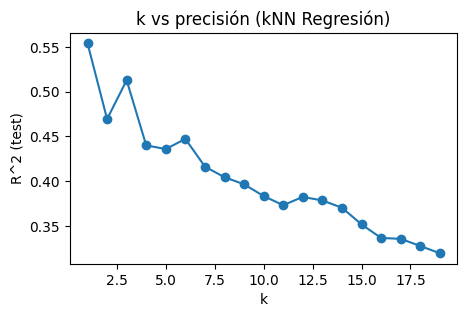

Mejor k: 1 | R^2: 0.554


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

ks = list(range(1, 20))
r2_test = []

for k in ks:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    r2_test.append(modelo.score(X_test, y_test))

best_k = ks[r2_test.index(max(r2_test))]

plt.figure(figsize=(5, 3))
plt.plot(ks, r2_test, marker="o")
plt.xlabel("k")
plt.ylabel("R^2 (test)")
plt.title("k vs precisión (kNN Regresión)")
plt.show()

print("Mejor k:", best_k, "| R^2:", round(max(r2_test), 3))

In [17]:
ks = list(range(1, 20))
r2_test = []
mse_test = []

for k in ks:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    r2_test.append(modelo.score(X_test, y_test))
    mse_test.append(((y_test.values - pred) ** 2).mean())

best_k_r2 = ks[r2_test.index(max(r2_test))]
best_k_mse = ks[mse_test.index(min(mse_test))]

print("Mejor k por R^2:", best_k_r2, "| R^2:", round(max(r2_test), 3))
print("Mejor k por MSE:", best_k_mse, "| MSE:", round(min(mse_test), 3))


Mejor k por R^2: 1 | R^2: 0.554
Mejor k por MSE: 1 | MSE: 395.065


Para escoger el valor de k en kNN para regresión se evaluaron valores de k entre 1 y 19 usando el conjunto de prueba. En cada caso se calculó el desempeño con R^2 y también con el error cuadrático medio MSE, la idea fue elegir el k que mejor generaliza en test

Los resultados muestran que k = 1 obtiene el mayor R^2 en prueba con 0.554 y al mismo tiempo el menor MSE con 395.065, por eso se toma como el valor óptimo dentro del rango evaluado. Aunque k = 1 puede ser más sensible porque depende del vecino más cercano, en este dataset y con esta partición fue el que dio el mejor ajuste en prueba y por eso se mantiene



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [18]:
modelo = KNeighborsRegressor(n_neighbors=1)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = ((y_test.values - y_pred) ** 2).mean()
print("MSE:", round(mse, 3))


MSE: 395.065


Con el valor seleccionado k = 1 se entrenó el modelo kNN de regresión usando el conjunto de entrenamiento y se evaluó con el conjunto de prueba. El desempeño se midió con el error cuadrático medio, el cual resume qué tan lejos están las predicciones de los valores reales de HP

El resultado obtenido fue un MSE de 395.065, lo que indica que en promedio el modelo comete un error cuadrático de ese orden en la variable objetivo. Este valor se reporta como la métrica principal solicitada para la parte de regresión y además es consistente con la selección previa de k, porque k = 1 fue el que produjo el menor MSE dentro del rango evaluado
